In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [13]:
df = pd.read_csv("./data_out_all_date.csv")
df.head()

,station,year,month,day,lon,lat,elevation,tmpf,dwpf,relh,...,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,p01m_tmrw
0,0,2021,11,1,-103.995,41.5117,1602.91,29.145833,27.562500,93.718750,...,1027.533333,0,3.452917,0,0,0,404.166667,5850.000000,7833.333333,0
1,0,2021,11,2,-103.995,41.5117,1602.91,33.370833,31.445833,92.686250,...,1028.095833,0,4.129583,0,0,0,912.500000,6366.666667,8000.000000,0
2,0,2021,11,3,-103.995,41.5117,1602.91,41.130435,34.447826,80.194348,...,1025.630435,0,7.254348,0,0,0,3665.217391,6500.000000,8000.000000,0
3,0,2021,11,4,-103.995,41.5117,1602.91,47.091304,30.860870,56.218261,...,1019.752174,0,10.000000,0,0,0,5000.000000,6500.000000,8000.000000,0
4,0,2021,11,5,-103.995,41.5117,1602.91,54.620833,27.370833,37.591250,...,1013.533333,0,10.000000,0,0,0,9125.000000,7187.500000,8000.000000,0


In [14]:
len(df)

15660

In [15]:
X = df.drop(['p01m_tmrw'], axis=1)

y = df['p01m_tmrw']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
X_train.shape, X_test.shape

((12528, 21), (3132, 21))

In [18]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [19]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['station',
 'year',
 'month',
 'day',
 'lon',
 'lat',
 'elevation',
 'tmpf',
 'dwpf',
 'relh',
 'feel',
 'alti',
 'mslp',
 'p01m',
 'vsby',
 'skyc1',
 'skyc2',
 'skyc3',
 'skyl1',
 'skyl2',
 'skyl3']

In [20]:
# check missing values in X_test

X.isnull().sum()

station      0
year         0
month        0
day          0
lon          0
lat          0
elevation    0
tmpf         0
dwpf         0
relh         0
feel         0
alti         0
mslp         0
p01m         0
vsby         0
skyc1        0
skyc2        0
skyc3        0
skyl1        0
skyl2        0
skyl3        0
dtype: int64

<h2>Feature Scaling</h2>

In [21]:
cols = X_train.columns

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

<h2>Model Training</h2>

In [24]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [25]:
# prediction
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.96957433, 0.81290204, 0.96490639, ..., 0.79878624, 0.97483783,
       0.59169564])

In [27]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.03042567, 0.18709796, 0.03509361, ..., 0.20121376, 0.02516217,
       0.40830436])

<h2>Accuracy</h2>

In [28]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8857


In [29]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8887


In [31]:
# check for overfitting/underfitting

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8887
Test set score: 0.8857


In [32]:
# fit the Logsitic Regression model with C=100 for potential underfitting

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [33]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8884
Test set score: 0.8857


In [34]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8890
Test set score: 0.8873


In [36]:
# null accuracy
# check class distribution in test set

y_test.value_counts()

0    2779
1     353
Name: p01m_tmrw, dtype: int64

In [37]:
# check null accuracy score

null_accuracy = (15995/(15995+2578))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8612


<h2>Confusion Matrix</h2>

In [38]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2774    5]
 [ 353    0]]

True Positives(TP) =  2774

True Negatives(TN) =  0

False Positives(FP) =  5

False Negatives(FN) =  353


<AxesSubplot:>

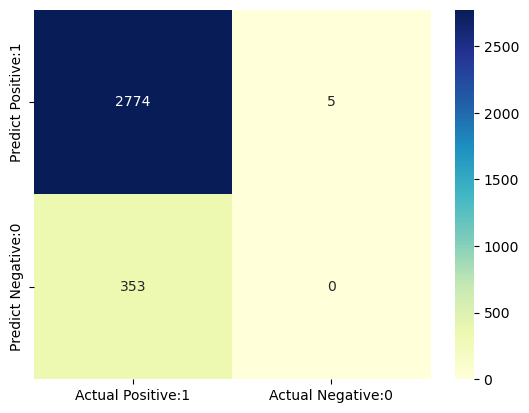

In [39]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<h2>Classification Matrix</h2>

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2779
           1       0.00      0.00      0.00       353

    accuracy                           0.89      3132
   macro avg       0.44      0.50      0.47      3132
weighted avg       0.79      0.89      0.83      3132



In [41]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [42]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8857


In [43]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1143


In [44]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9982


In [45]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8871


In [46]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8871


In [47]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 1.0000


In [48]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.0000


<h2>Adjusting Threshold Level</h2>

In [49]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.96957433, 0.03042567],
       [0.81290204, 0.18709796],
       [0.96490639, 0.03509361],
       [0.85672986, 0.14327014],
       [0.74713626, 0.25286374],
       [0.7611571 , 0.2388429 ],
       [0.92409534, 0.07590466],
       [0.97558935, 0.02441065],
       [0.96592655, 0.03407345],
       [0.88203676, 0.11796324]])

In [50]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.969574,0.030426
1,0.812902,0.187098
2,0.964906,0.035094
3,0.856730,0.143270
4,0.747136,0.252864
5,0.761157,0.238843
6,0.924095,0.075905
7,0.975589,0.024411
8,0.965927,0.034073
9,0.882037,0.117963


In [51]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.03042567, 0.18709796, 0.03509361, 0.14327014, 0.25286374,
       0.2388429 , 0.07590466, 0.02441065, 0.03407345, 0.11796324])

In [52]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

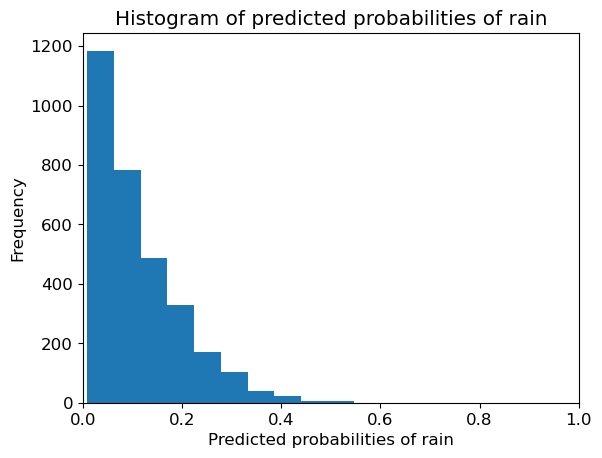

In [53]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

<h2>ROC AUC</h2>

In [54]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7414


In [55]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7370


<h2>k fold cross validation<h2>

In [56]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.8886672  0.8886672  0.88946528 0.88902196 0.88822355]


In [57]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8888


<h2>Hyperparameter Optimization<h2>

In [58]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [59]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8888


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [60]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8857
